In [2]:
import random
import logging
import random
from itertools import permutations
from collections import defaultdict
import numpy as np

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload
import scripts as s
import rolling_functions as roll_func

## Functions

In [3]:
def plot_amts_by_rd(rd_amt_list, bankroll, xmax, title=''):
    plt.figure(figsize=(10,4))
    for data in rd_amt_list:
        plt.plot(data, alpha=0.4, color='grey', zorder=1)
        plt.scatter(len(data)-1, data[-1], marker='o', color='k', zorder=2, alpha=0.8)

    plt.hlines(bankroll, 0, xmax, lw=4, color='red')
    plt.ylabel('$ in Bank')
    plt.xlabel('Round');
    plt.title(f'$ vs Round - {title}');

def plot_by_rd_with_hist(rd_amt_list, ending_amt, bankroll, title=''):
    fig = plt.figure(figsize=(15,4), constrained_layout=True)
    gs = fig.add_gridspec(1, 4)
    fig.suptitle(f'Bank Amt vs Round - {title}')

    ax1 = fig.add_subplot(gs[0, :-1])
    for data in rd_amt_list:
        ax1.plot(data, alpha=0.4, color='grey', zorder=1)
        ax1.scatter(len(data)-1, data[-1], marker='o', color='k', zorder=2)

    ax1.hlines(bankroll, 0, max(len(data) for data in rd_amt_list), lw=4, color='red', alpha=0.8)
    ax1.set_ylabel('$ in Bank')
    ax1.set_xlabel('Round');

    ax2 = fig.add_subplot(gs[0, -1])
    ax2.hist(ending_amt, orientation='horizontal', bins=22, color='black')
    xlim = ax2.get_xlim()[1]
    ax2.hlines(bankroll, 0, xlim, lw=4, color='red')
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel('Ending $ Amt');

def simulate_sessions(strategy, strat_name, strat_args, num_reps):
    num_rolls = []
    num_games = []
    ending_amt = []
    amt_by_rd = []
    
    for _ in range(num_reps):
        games, rolls, amt, amt_list = strategy(*strat_args)
        num_games.append(games)
        num_rolls.append(rolls)
        ending_amt.append(amt)
        amt_by_rd.append(amt_list)
    
    # bankroll is always first in strat_args (though I recognize this is a poor way to ID it)
    # here, starting amount = bankroll
    init_amt = strat_args[0]
    num_winning_rds = len([amt for amt in ending_amt if amt > init_amt])
    pct_win = num_winning_rds / num_reps
    print(f'{pct_win:.1%} of the time you win money')
    print(f"Expected Value: ${np.round(np.mean(ending_amt), 2)}")
    plot_by_rd_with_hist(amt_by_rd, ending_amt, bankroll, strat_name)    
    return pct_win, num_games, num_rolls, ending_amt, amt_by_rd

def odds_to_prob(a, b, a_win=True):
    if a_win:
        return a / (a + b)
    else:
        return b / (a + b)

# Simulations

In [4]:
bankroll = 100
max_rolls = 100
num_reps = 1000
min_bet = 5
place_bet = 6

strategy_dict = {}

## Pass Line only

In [6]:
strat_name = 'Pass Line Only'
strat_func = roll_func.pass_line_only
true_odds = (251, 244)

38.8% of the time you win money
Expected Value: $94.46


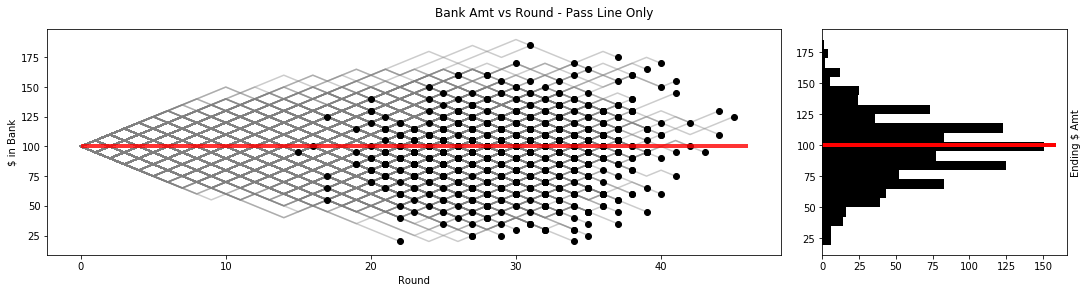

In [7]:
pct_win, num_games, num_rolls, ending_amts, _ = simulate_sessions(
    strat_func, 
    strat_name,
    [bankroll, max_rolls, min_bet], 
    num_reps)

In [8]:
true_odds_pct = odds_to_prob(*true_odds)
print(f"Actual win odds: {true_odds_pct: .1%}")
diff = true_odds_pct - pct_win
print(f"Diff: {diff: .1%}")

Actual win odds:  50.7%
Diff:  11.9%


In [9]:
strategy_dict[strat_name] = {'pct_win': pct_win, 'true_odd_pct': true_odds_pct, 'diff_win_pct': diff,
                            'ending_amts': ending_amts, 'expected_value': np.round(np.mean(ending_amts), 2),
                             'num_sim': num_reps}

## Don't Pass Line only

In [10]:
strat_name = 'Dont Pass Line Only'
strat_func = roll_func.dont_pass_line_only
true_odds = (976, 949)

42.6% of the time you win money
Expected Value: $97.42


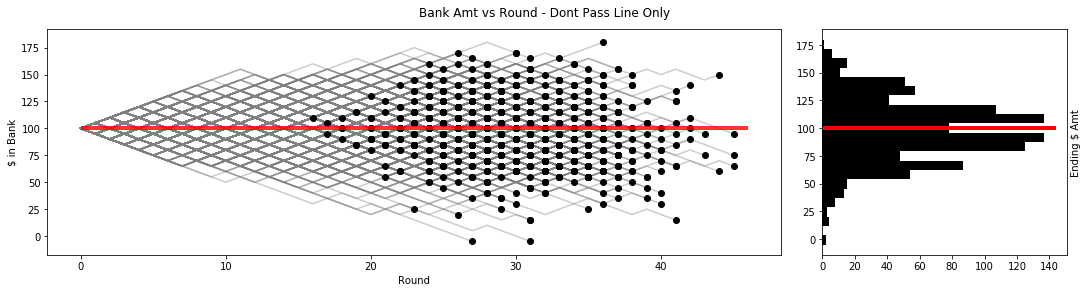

In [11]:
pct_win, num_games, num_rolls, ending_amts, _ = simulate_sessions(
    strat_func, 
    strat_name,
    [bankroll, max_rolls, min_bet], 
    num_reps)

In [12]:
true_odds_pct = odds_to_prob(*true_odds)
print(f"Actual win odds: {true_odds_pct: .1%}")
diff = true_odds_pct - pct_win
print(f"Diff: {diff: .1%}")

Actual win odds:  50.7%
Diff:  8.1%


In [13]:
strategy_dict[strat_name] = {'pct_win': pct_win, 'true_odd_pct': true_odds_pct, 'diff_win_pct': diff,
                            'ending_amts': ending_amts, 'expected_value': np.round(np.mean(ending_amts), 2),
                             'num_sim': num_reps}

## Pass & Come

In [ ]:
num_games, num_rolls, pac_end_amts, pac_amt_by_rd = simulate_sessions(roll_func.pass_and_come, 
                                                                      [bankroll, max_rolls, min_bet, 1], 
                                                                      1000)

In [ ]:
plot_by_rd_with_hist(pac_amt_by_rd, pac_end_amts, bankroll, 'Pass & 1-Come')

In [ ]:
num_games, num_rolls, pac_end_amts, pac_amt_by_rd = simulate_sessions(roll_func.pass_and_come, 
                                                                      [bankroll, max_rolls, min_bet, 2], 
                                                                      1000)

plot_by_rd_with_hist(pac_amt_by_rd, pac_end_amts, bankroll, 'Pass & 2-Come')

In [ ]:
num_games, num_rolls, pac_end_amts, pac_amt_by_rd = simulate_sessions(roll_func.pass_and_come, 
                                                                      [bankroll, max_rolls, min_bet, 3], 
                                                                      1000)

plot_by_rd_with_hist(pac_amt_by_rd, pac_end_amts, bankroll, 'Pass & 2-Come')

In [ ]:
num_games, num_rolls, pac_end_amts, pac_amt_by_rd = simulate_sessions(roll_func.pass_and_come, 
                                                                      [bankroll, max_rolls, min_bet, 4], 
                                                                      1000)

plot_by_rd_with_hist(pac_amt_by_rd, pac_end_amts, bankroll, 'Pass & 2-Come')

In [ ]:
num_games, num_rolls, pac_end_amts, pac_amt_by_rd = simulate_sessions(roll_func.pass_and_come, 
                                                                      [bankroll, max_rolls, min_bet, 5], 
                                                                      1000)

plot_by_rd_with_hist(pac_amt_by_rd, pac_end_amts, bankroll, 'Pass & 2-Come')

In [ ]:
num_games, num_rolls, pac_end_amts, pac_amt_by_rd = simulate_sessions(roll_func.pass_and_come, 
                                                                      [bankroll, max_rolls, min_bet, 6], 
                                                                      1000)

plot_by_rd_with_hist(pac_amt_by_rd, pac_end_amts, bankroll, 'Pass & 2-Come')

## Don't Pass

In [ ]:
_, _, dnp_end_amts, dnp_amt_by_rd = simulate_sessions(roll_func.dont_pass_line_only, 
                                                      [bankroll, max_rolls, min_bet], 
                                                      1000)

In [ ]:
plot_by_rd_with_hist(dnp_amt_by_rd, dnp_end_amts, bankroll, "Don't Pass")

In [ ]:
_, _, pl68_end_emts, pl68_amt_by_rd = simulate_sessions(roll_func.place_bets_6and8, 
                                                      [bankroll, max_rolls, min_bet, place_bet, False], 
                                                      1000)

In [ ]:
plot_by_rd_with_hist(pl68_amt_by_rd, pl68_end_emts, bankroll, "Place 6 & 8 - Off")

In [ ]:
_, _, pl68_end_emts, pl68_amt_by_rd = simulate_sessions(roll_func.place_bets_6and8, 
                                                      [bankroll, max_rolls, min_bet, place_bet, True], 
                                                      1000)

plot_by_rd_with_hist(pl68_amt_by_rd, pl68_end_emts, bankroll, "Place 6 & 8 - On")

What if we increase our bankroll?

In [ ]:
_, _, pl68_end_emts, pl68_amt_by_rd = simulate_sessions(roll_func.place_bets_6and8, 
                                                      [500, max_rolls, min_bet, place_bet, True], 
                                                      1000)

plot_by_rd_with_hist(pl68_amt_by_rd, pl68_end_emts, 500, "Place 6 & 8 - On")

In [ ]:
np.mean(plo_amts), np.mean(pac_end_amts), np.mean(dnp_end_amts)